In [2]:
import numpy as np
# load data from ReachData.npz
data=np.load('/Users/yangrenqin/GitHub/HW5/ReachData.npz')
r=data['r']
targets=data['targets']
target_index=data['cfr']
data.close()

# 1. Visualization of high-dimensional neural activity using PCA (30 pts)

In [3]:
# picking spikes from data using a constant 200ms window
N=[]
for i in range(len(r)):
    p1=r[i].timeTouchHeld + 50
    p2=p1+200
    N2=[]
    for l in range(190):
        if type(r[i].unit[l].spikeTimes) == float:   # when there is only one spike and its spiketime
            N0=round(r[i].unit[l].spikeTimes) in range(p1,p2)
            N1=int(N0)
            
        elif list(r[i].unit[l].spikeTimes) == []:   # when there is no spike and its spiketime
            N1=0
            
        else:                                      # when there are more than one spikes and their spiketimes
            N0=(r[i].unit[l].spikeTimes>p1) & (r[i].unit[l].spikeTimes<p2)
            N1=np.sum(N0)
        N2.append(N1)
    N.append(N2)

In [4]:
N=np.array(N)
np.shape(N)

(1127, 190)

## a.

In [5]:
# calculate mean and coveriance matrixs for the picking spikes.
N_means=np.mean(N,axis=0)

N_coveriance=np.dot((N-N_means).T,(N-N_means))

np.shape(N_coveriance)

(190, 190)

In [135]:
# calculate eigenvaules and eigenvectors for the coveriance matrixs
w,v=np.linalg.eig(N_coveriance)

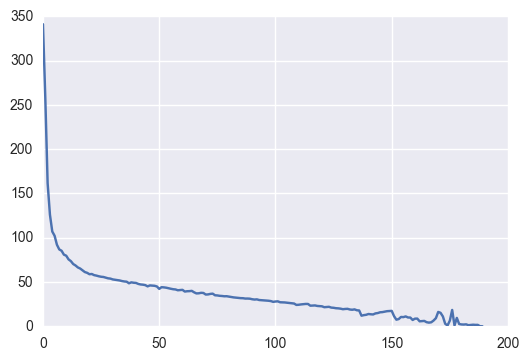

In [136]:
# using eigenvalue spectrum to defined the 'elbow', which decides the number of  lower dimensions m  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(np.arange(len(w)),np.sqrt(w))

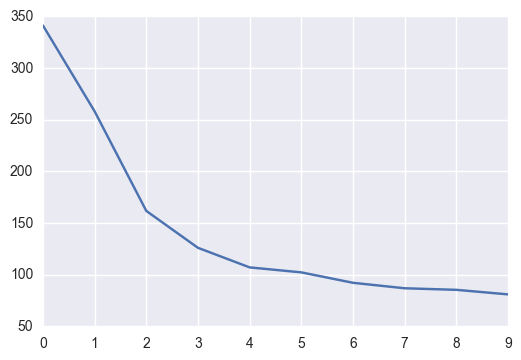

In [139]:
plt.plot(np.arange(len(w[:10])),np.sqrt(w[:10]))

### It takes around 7 dominant eigenvalues to identify an elbow in the eigenvalue spectrum

In [141]:
percentage=sum(w[:3])/sum(w)
print('%.2f percentage of the overall variance is captured by the top 3 principal components'%(percentage*100))

42.43 percentage of the overall variance is captured by the top 3 principal components


## b.

In [185]:
# project into lower dimensional space
new_x1=[]
for i in range (3):
    sigma2=np.dot((N-N_means),v[:,i])
    new_x1.append(sigma2)

new_x1=np.array(new_x1)
new_x1=new_x1.T
new_x1

array([[  4.98978809,  -7.4926411 ,   0.6458436 ],
       [ -7.55340983,  -0.5264194 ,  -4.62073448],
       [  9.21357617,  13.42205089,  -0.94298982],
       ..., 
       [ 11.73777497,  13.35338116,  -5.79993341],
       [  0.92368934,   9.12828084,   3.20886084],
       [-11.83424742,  -1.77468221,  -2.55848129]])

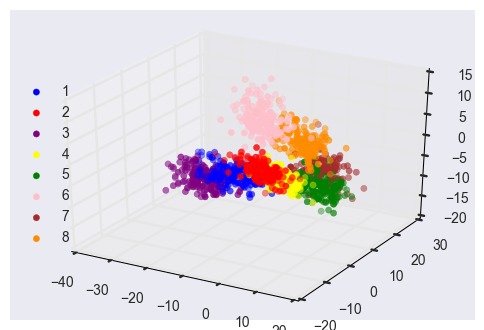

In [186]:
# Plot the projected points in a 3D plot and color each dot appropriately according to reaching target.
import pandas as pd
target_index2=pd.DataFrame(target_index,columns=['target'])
target_N=[]
for i in range(8):
    i=i+1
    target_i=list(target_index2[target_index2.target==i].index)
    target_N.append(target_i)
    
    
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors=['blue','red','purple','yellow','green','pink','brown','darkorange']
for i,color in enumerate(colors):
    x=[new_x1[l,0] for l in target_N[i]]
    y=[new_x1[l,1] for l in target_N[i]]
    z=[new_x1[l,2] for l in target_N[i]]
    ax.scatter(xs=x,ys=y,zs=z, color=color, label=i+1)

ax.legend(loc='center left')

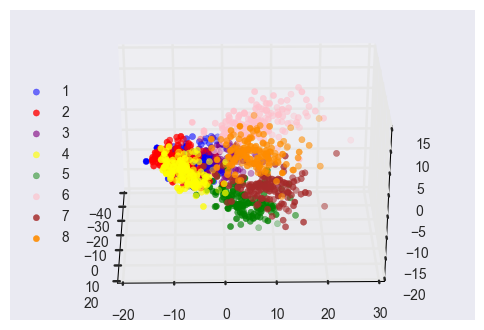

In [211]:
# Rotate the axes to show a view in which the clusters are well-separated.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors=['blue','red','purple','yellow','green','pink','brown','darkorange']
for i,color in enumerate(colors):
    x=[new_x1[l,0] for l in target_N[i]]
    y=[new_x1[l,1] for l in target_N[i]]
    z=[new_x1[l,2] for l in target_N[i]]
    ax.scatter(xs=x,ys=y,zs=z, color=color, label=i+1)
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
ax.legend(loc='center left')

## c.

In [190]:
# find PC directions
U=v[:,1:4]
np.shape(U)

(190, 3)

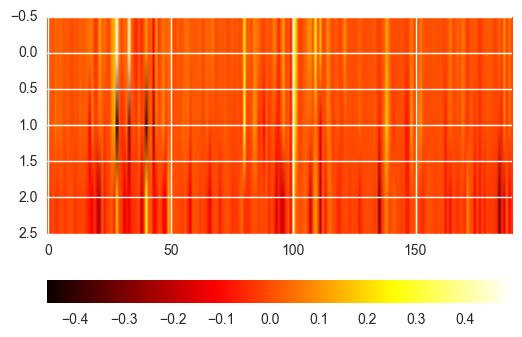

In [194]:
# plot the imshow of PC directions
import pylab
im = pylab.imshow(U.T,cmap='hot',aspect='auto')
pylab.colorbar(im,orientation='horizontal')
pylab.show()

### Yes, like at around 30th and100th neurons, they grouping map to the reduced first dimension; and around 100th and 140th neurons grouping map to the reduced second dimension; around 40thth and 100th neurons grouping map to the reduced second dimension.

# 2. Reducing the dimensionality of spike waveforms (40 pts)

# a.

In [49]:
# import data from 'SpikeData05.npz'
data2 = np.load('/Users/yangrenqin/GitHub/HW6/SpikeData05.npz')
spikewaveforms = data2['SpikeWaveforms']
data.close()

In [155]:
# picking data and calculate means and coveriance matrixs
N2=spikewaveforms[:5000,:,0]
N2_means=np.mean(N2,axis=0)
N2_covariance=np.dot((N2-N2_means).T,(N2-N2_means))

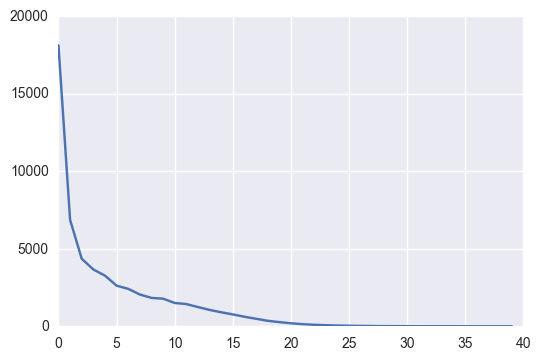

In [156]:
w2,v2=np.linalg.eig(N2_covariance)

plt.plot(np.arange(len(w2)),np.sqrt(w2))

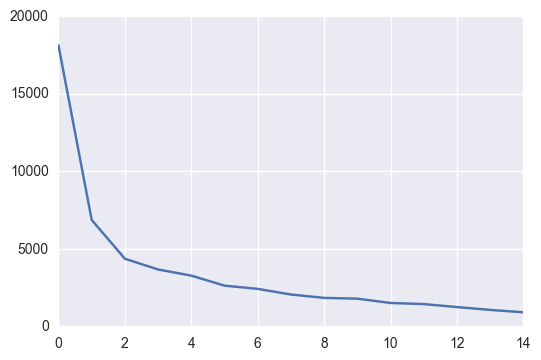

In [157]:
plt.plot(np.arange(len(w2[:15])),np.sqrt(w2[:15]))

### It takes around 8 dominant eigenvalues to identify an elbow in the eigenvalue spectrum

In [158]:
percentage2=sum(w2[:3])/sum(w2)
print('%.2f percentage of the overall variance is captured by the top 3 principal components'%(percentage2*100))

87.42 percentage of the overall variance is captured by the top 3 principal components


## b.

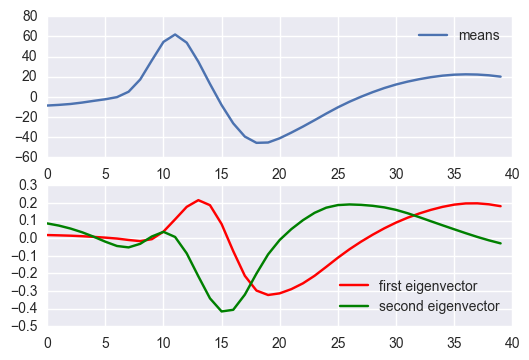

In [195]:
# Plot the mean and the first 2 principal components directions
plt.subplot(211)
plt.plot(np.arange(40),N2_means,label='means')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(np.arange(40),v2[:,0],label='first eigenvector',color='r')
plt.plot(np.arange(40),v2[:,1],label='second eigenvector',color='g')
plt.legend(loc='best')

In [196]:
# back project into original data space
first_PC=[]
for i in range(5000):
    s1=np.dot((N2[i]-N2_means).T,v2[:,0])
    first_PC.append(s1)
    
second_PC=[]
for i in range(5000):
    s2=np.dot((N2[i]-N2_means).T,v2[:,1])
    second_PC.append(s2)

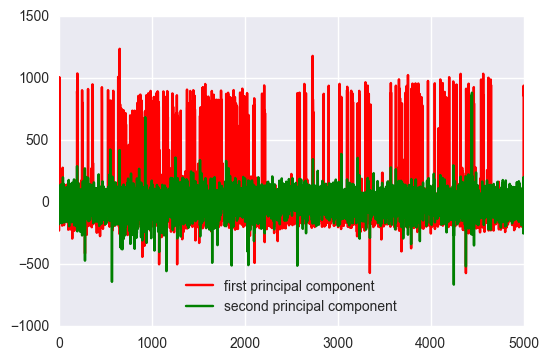

In [197]:
plt.plot(np.arange(5000),first_PC,label='first principal component',color='r')
plt.plot(np.arange(5000),second_PC,label='second principal component',color='g')
plt.legend(loc='best')

## c.

In [162]:
# import data from 'SpikeData12.npz'
data3 = np.load('/Users/yangrenqin/GitHub/HW6/SpikeData12.npz')
spikewaveforms2 = data3['SpikeWaveforms']
data3.close()

In [73]:
N3=spikewaveforms2[:5000,:,0]
N3_means=np.mean(N3,axis=0)
N3_covariance=np.dot((N3-N3_means).T,(N3-N3_means))

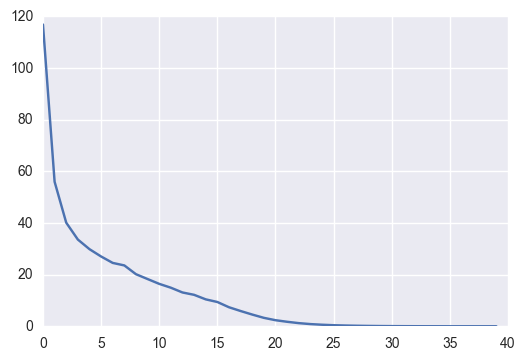

In [163]:
w3,v3=np.linalg.eig(N3_covariance)

plt.plot(np.arange(len(w3)),np.sqrt(w3))

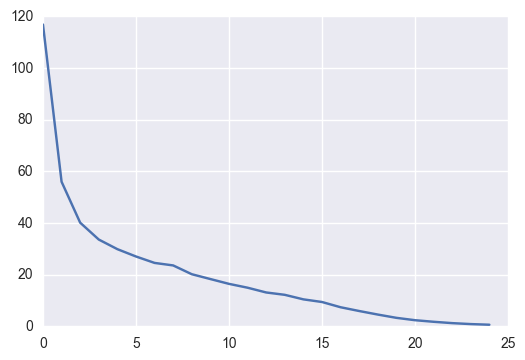

In [165]:
plt.plot(np.arange(len(w3[:25])),np.sqrt(w3[:25]))

### It takes around 20 dominant eigenvalues to identify an elbow in the eigenvalue spectrum

In [166]:
percentage3=sum(w3[:3])/sum(w3)
print('%.2f percentage of the overall variance is captured by the top 3 principal components'%(percentage3*100))

76.06 percentage of the overall variance is captured by the top 3 principal components


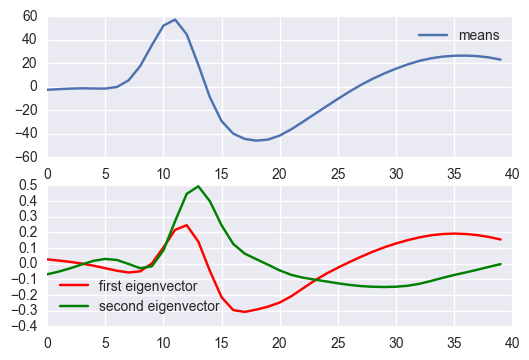

In [198]:
plt.subplot(211)
plt.plot(np.arange(40),N3_means,label='means')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(np.arange(40),v3[:,0],label='first eigenvector',color='r')
plt.plot(np.arange(40),v3[:,1],label='second eigenvector',color='g')
plt.legend(loc='best')

In [199]:
first_PC=[]
for i in range(5000):
    s1=np.dot((N3[i]-N3_means).T,v3[:,0])
    first_PC.append(s1)
    
second_PC=[]
for i in range(5000):
    s2=np.dot((N3[i]-N3_means).T,v3[:,1])
    second_PC.append(s2)

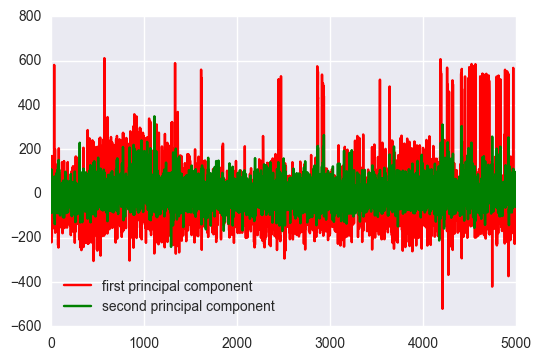

In [200]:
plt.plot(np.arange(5000),first_PC,label='first principal component',color='r')
plt.plot(np.arange(5000),second_PC,label='second principal component',color='g')
plt.legend(loc='best')

### Except from lower percentage of the overall variance is captured by the top 3 principal components,and more dominant eigenvalues to identify an elbow in the eigenvalue spectrum, there is no other major differences

## d.

In [170]:
# reshape 4 channels into one single channel
N4=spikewaveforms2[:5000,:,0]
for i in range(3):
    N40=spikewaveforms2[:5000,:,i+1]
    N4=np.append(N4,N40,axis=1)

In [171]:
np.shape(N4)

(5000, 160)

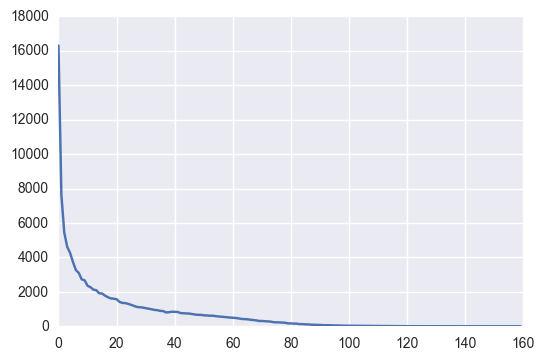

In [172]:
N4_means=np.mean(N4,axis=0)
N4_covariance=np.dot((N4-N4_means).T,(N4-N4_means))
w4,v4=np.linalg.eig(N4_covariance)

plt.plot(np.arange(len(w4)),np.sqrt(w4))

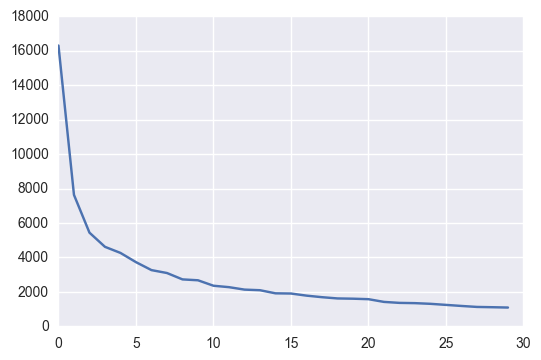

In [173]:
plt.plot(np.arange(len(w4[:30])),np.sqrt(w4[:30]))

### It takes around 10 dominant eigenvalues to identify an elbow in the eigenvalue spectrum

## e.

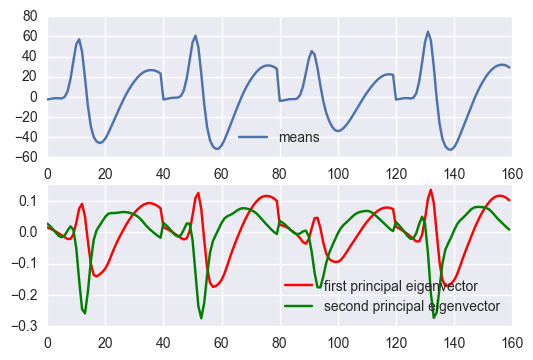

In [201]:
plt.subplot(211)
plt.plot(np.arange(160),N4_means,label='means')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(np.arange(160),v4[:,0],label='first principal eigenvector',color='r')
plt.plot(np.arange(160),v4[:,1],label='second principal eigenvector',color='g')
plt.legend(loc='best')

In [202]:
first_PC=[]
for i in range(5000):
    s1=np.dot((N4[i]-N4_means).T,v4[:,0])
    first_PC.append(s1)
    
second_PC=[]
for i in range(5000):
    s2=np.dot((N4[i]-N4_means).T,v4[:,1])
    second_PC.append(s2)

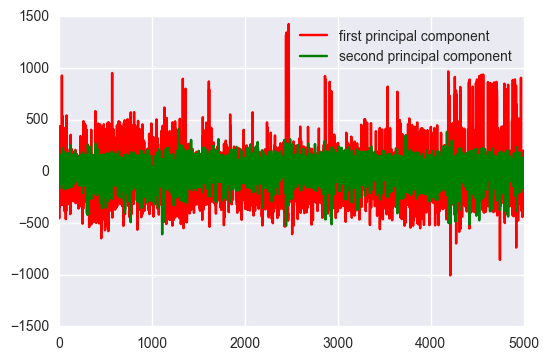

In [203]:
plt.plot(np.arange(5000),first_PC,label='first principal component',color='r')
plt.plot(np.arange(5000),second_PC,label='second principal component',color='g')
plt.legend(loc='best')

### For the first two principal components

In [205]:
# calculate original variance
orignal_var_first_tetrode_PCA=np.var(N3)
orignal_var_single_tetrode_PCA=np.var(N4)

# project into lower dimensional space and back project into original data space
for i in range(2):
    sigma1=np.outer(np.dot(N3-N3_means,v3[:,i]),v3[:,i])
new_N3=sigma1+N3_means
    
for i in range(2):
    sigma2=np.outer(np.dot(N4-N4_means,v4[:,i]),v4[:,i])
new_N4=sigma2+N4_means

In [206]:
# calculate the new variance and the ratio
new_var_first_tetrode_PCA=np.var(new_N3)
ratio1=new_var_first_tetrode_PCA/orignal_var_first_tetrode_PCA
new_var_signle_tetrode_PCA=np.var(new_N4)
ratio2=new_var_signle_tetrode_PCA/orignal_var_single_tetrode_PCA
print('the fraction of the variance in the first tetrode channel captured by the 4 channel PCA is %.4f'%ratio1)
print('the fraction of the variance inthe single channel PCA is %.4f'%ratio2)

the fraction of the variance in the first tetrode channel captured by the 4 channel PCA is 0.6040
the fraction of the variance inthe single channel PCA is 0.5929


In [207]:
print(orignal_var_first_tetrode_PCA)
print(orignal_var_single_tetrode_PCA)
print(new_var_first_tetrode_PCA)
print(new_var_signle_tetrode_PCA)

1327.97297157
1405.41399944
802.156379262
833.326556027


### For the first two principal components

In [208]:
for i in range(3):
    sigma1=np.outer(np.dot(N3-N3_means,v3[:,i]),v3[:,i])
new_N3_2=sigma1+N3_means
    
for i in range(3):
    sigma2=np.outer(np.dot(N4-N4_means,v4[:,i]),v4[:,i])
new_N4_2=sigma2+N4_means

In [209]:
new_var_first_tetrode_PCA=np.var(new_N3_2)
ratio1=new_var_first_tetrode_PCA/orignal_var_first_tetrode_PCA
new_var_signle_tetrode_PCA=np.var(new_N4_2)
ratio2=new_var_signle_tetrode_PCA/orignal_var_single_tetrode_PCA
print('the fraction of the variance in the first tetrode channel captured by the 4 channel PCA is %.4f'%ratio1)
print('the fraction of the variance inthe single channel PCA is %.4f'%ratio2)

the fraction of the variance in the first tetrode channel captured by the 4 channel PCA is 0.5754
the fraction of the variance inthe single channel PCA is 0.5674


In [210]:
print(orignal_var_first_tetrode_PCA)
print(orignal_var_single_tetrode_PCA)
print(new_var_first_tetrode_PCA)
print(new_var_signle_tetrode_PCA)

1327.97297157
1405.41399944
764.109027584
797.499299162
